In [1]:
import pandas as pd
import numpy as np
#import seaborn to make a nice heatmap for our confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

#import some necessary tools
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn import tree

#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

#Importing the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [2]:
df = pd.read_csv ('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.shape

(5110, 12)

In [5]:
#-deleted unnecessary columns
df.drop(columns =['id'], inplace=True)

In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
#-deleted duplicate rows
df.duplicated().sum()

0

In [8]:
#-identified and addressed missing values 
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#dropping missing values
df.dropna(inplace=True)

In [10]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
#-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)
df['ever_married'].value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [12]:
df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [13]:
df['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [14]:
df['work_type'].value_counts()
#there are no inconsistencies in this data

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

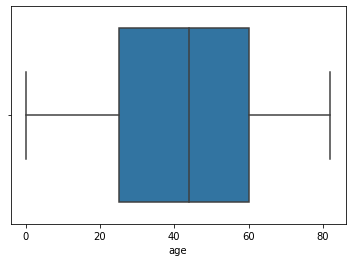

In [15]:
#-produced univariate visuals for the target and all features
sns.boxplot(data = df, x = 'age');

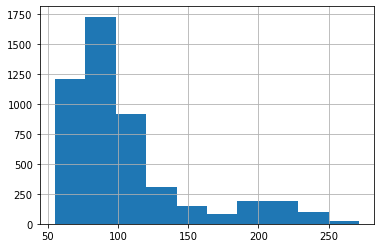

In [16]:
df['avg_glucose_level'].hist()

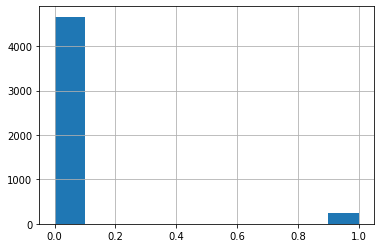

In [17]:
df['heart_disease'].hist()
#Majority of people in the dataset did not have a stroke

In [18]:
#-identified outliers
#there are no outliers

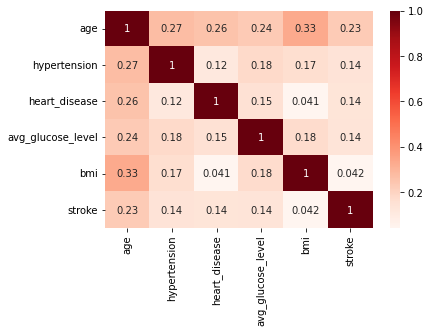

In [19]:
#-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another
import seaborn as sns
import matplotlib as plt
corr = df.corr()
sns.heatmap(corr,cmap='Reds', annot=True)
#There seems to be a correlation between stroke and the person's bmi


module

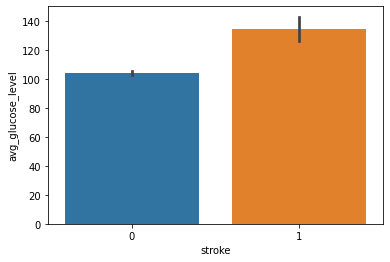

In [23]:
df1 = df[['stroke', 'avg_glucose_level']]

sns.barplot(data=df1, x='stroke', y='avg_glucose_level')
#plt.title('Glucose Based on Stroke')    
type(plt.legend)

In [ ]:
df.info()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix

In [ ]:
#Prepare the data appropriately for modeling 

In [ ]:
X = df.drop(columns = 'stroke')
y = df['stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
cat_feat = make_column_selector(dtype_include = 'object')

quant_feat = make_column_selector(dtype_include = 'number')


encoder = OneHotEncoder(handle_unknown = 'ignore')


scaler = StandardScaler()


column_transformer = make_column_transformer((encoder, cat_feat), (scaler, quant_feat))


In [ ]:
column_transformer

In [ ]:
df['stroke'].value_counts(normalize = True)


In [ ]:
#Model 1:Decision Tree
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth= 2)

In [ ]:
dec_tree

In [ ]:
dec_pipe = make_pipeline(column_transformer, dec_tree)

In [ ]:
dec_pipe.fit(X_train, y_train)


In [ ]:
dec_pipe.predict(X_test)

In [ ]:
train_score = dec_pipe.score(X_train, y_train)
test_score = dec_pipe.score(X_test, y_test)
print(train_score)
print(test_score)


In [ ]:
y_pred = dec_pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

In [ ]:
def evaluate_classification(y_true, y_pred, average=None):
  accuracy = accuracy_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred, average=average)
  precision = precision_score(y_true, y_pred, average=average)
  f1 = f1_score(y_true, y_pred, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')

In [ ]:
evaluate_classification(y_test, y_pred)

In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)

In [ ]:
confuse = confusion_matrix(y_test, y_pred)
print(confuse)

In [ ]:
sns.heatmap(confuse, cmap = 'Reds', annot = True);

In [ ]:
#Model 2: KNeighbors
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_pipe = make_pipeline(column_transformer, knn)

knn_pipe.fit(X_train, y_train)


In [ ]:
knn_pipe.get_params()

In [ ]:

knn_params = {'kneighborsclassifier__n_neighbors' : [2, 1],
              'kneighborsclassifier__leaf_size' : [1, 2]}
              

In [ ]:
knn_gs = GridSearchCV(knn_pipe, knn_params)

knn_gs.fit(X_train, y_train)


In [ ]:
y_pred2 = knn_gs.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(accuracy)


In [ ]:
def evaluate_classification(y_true, y_pred2, average=None):
  accuracy = accuracy_score(y_true, y_pred2)
  recall = recall_score(y_true, y_pred2, average=average)
  precision = precision_score(y_true, y_pred2, average=average)
  f1 = f1_score(y_true, y_pred2, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')

In [ ]:
evaluate_classification(y_test, y_pred)

In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)

In [ ]:
confuse = confusion_matrix(y_test, y_pred)
print(confuse)

In [ ]:
sns.heatmap(confuse, cmap = 'Reds', annot = True);

In [ ]:
#Model 3: ROC Curve
logreg = LogisticRegression(C = .001)

scaler = StandardScaler(with_mean=False)

logreg_pipe = make_pipeline(encoder, scaler, logreg)





In [ ]:
logreg_pipe.fit(X_train, y_train)

In [ ]:

print(f'Training AUC: {roc_auc_score(y_train, logreg_pipe.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg_pipe.predict_proba(X_test)[:,1])}')


In [ ]:
#Model 3: ROC Curve
logreg1 = LogisticRegression(C = .500)

scaler = StandardScaler(with_mean=False)

logreg_pipe1 = make_pipeline(encoder, scaler, logreg)





In [ ]:
logreg_pipe1.fit(X_train, y_train)

In [ ]:

print(f'Training AUC: {roc_auc_score(y_train, logreg_pipe.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg_pipe.predict_proba(X_test)[:,1])}')


In [ ]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [ ]:
transform_train = column_transformer.transform(X_train)

In [ ]:
transform_test = column_transformer.transform(X_test)

In [ ]:

tree.plot_tree(dec_pipe['decisiontreeclassifier'])

In [ ]:
dec_pipe['decisiontreeclassifier']

In [ ]:
transform_train = column_transformer.transform(X_train)

In [ ]:
transform_test = column_transformer.transform(X_test)

In [ ]:
#For the production model I will choose the decision tree because the train score got a 100% and that is very efficient compared to the other models. The ROC Curve model was close with the training scores with the Decision Tree model but the Decision Tree model had better Testing scores. The Decison Tree model will preform very well in the real world because of its high test scores